<a href="https://colab.research.google.com/github/MohammadRaziei/Deep-Learning-Course/blob/master/HW03/Q6/HW03_Q6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 


## Preprocessing

load `MNIST` dataset

train.shape:  (60000, 28, 28)   ,test.shape:  (10000, 28, 28)


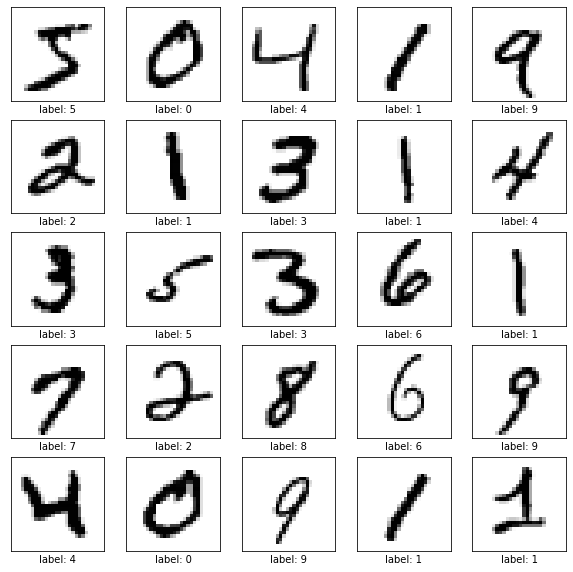

Data is loaded successfully :)


In [3]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img

def plot_image(img, method=None):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)

np.random.seed(37) #dont change this line



(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('train.shape: ', x_train.shape, '  ,test.shape: ', x_test.shape)


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plot_image(x_train[i])
    plt.xlabel('label: {}'.format(y_train[i]))
plt.show()

print('Data is loaded successfully :)')

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy, CategoricalCrossentropy, MeanSquaredError


## PART A

In [5]:

data_train = x_train.reshape((x_train.shape[0],-1))/255
data_test = x_test.reshape((x_test.shape[0],-1))/255

data_dim = data_train.shape[1];

### AutoEncoder with shallow fullyConnected layer

In [6]:
# Make encoder:
encoder_input = Input(shape=(data_dim), name='Encoder_input')
encoded = Dense(60, activation="sigmoid", name='Encoded')(encoder_input)
encoder_model = Model(encoder_input, encoded, name='Encoder')

# Make decoder:
decoder_input = Input(shape=encoded.shape[1:], name='Encoder_input')
decoded  = Dense(data_dim, activation="sigmoid", name='Decoded')(decoder_input)
decoder_model = Model(decoder_input, decoded, name='Decoder')

# Make autoencoder:
ae_input = Input(shape=(data_dim), name='AutoEncoder_input')
ae_encoded = encoder_model(ae_input)
ae_decoded = decoder_model(ae_encoded)
autoencoder_model = Model(inputs=ae_input, outputs=ae_decoded, name='AutoEncoder')

autoencoder_model.compile(optimizer='adam', 
              loss=MeanSquaredError(), 
              metrics=['accuracy'])

history = autoencoder_model.fit(data_train, 
                    data_train,
                    batch_size=64,
                    epochs=20,
                    verbose=2,
                    validation_data=(data_test,data_test)
                    )


Epoch 1/20
938/938 - 2s - loss: 0.0674 - accuracy: 0.0121 - val_loss: 0.0546 - val_accuracy: 0.0168
Epoch 2/20
938/938 - 2s - loss: 0.0462 - accuracy: 0.0146 - val_loss: 0.0397 - val_accuracy: 0.0116
Epoch 3/20
938/938 - 2s - loss: 0.0361 - accuracy: 0.0112 - val_loss: 0.0326 - val_accuracy: 0.0091
Epoch 4/20
938/938 - 2s - loss: 0.0305 - accuracy: 0.0106 - val_loss: 0.0282 - val_accuracy: 0.0104
Epoch 5/20
938/938 - 2s - loss: 0.0269 - accuracy: 0.0104 - val_loss: 0.0250 - val_accuracy: 0.0103
Epoch 6/20
938/938 - 2s - loss: 0.0240 - accuracy: 0.0102 - val_loss: 0.0226 - val_accuracy: 0.0095
Epoch 7/20
938/938 - 2s - loss: 0.0222 - accuracy: 0.0108 - val_loss: 0.0211 - val_accuracy: 0.0124
Epoch 8/20
938/938 - 2s - loss: 0.0209 - accuracy: 0.0110 - val_loss: 0.0199 - val_accuracy: 0.0126
Epoch 9/20
938/938 - 2s - loss: 0.0197 - accuracy: 0.0112 - val_loss: 0.0188 - val_accuracy: 0.0129
Epoch 10/20
938/938 - 2s - loss: 0.0186 - accuracy: 0.0114 - val_loss: 0.0177 - val_accuracy: 0.0119

##### Visualization

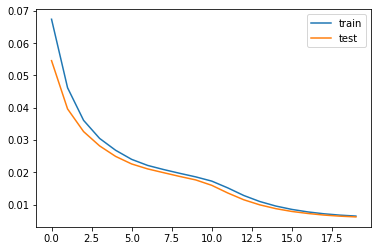

In [7]:
import matplotlib.pyplot as plt
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [8]:
# plot the autoencoder
tf.keras.utils.plot_model(encoder_model, 'shallow_encoder_model.png', show_shapes=True)
encoder_model.save('shallow_encoder.h5')
tf.keras.utils.plot_model(decoder_model, 'shallow_decoder_model.png', show_shapes=True)
encoder_model.save('shallow_decoder.h5')
tf.keras.utils.plot_model(autoencoder_model, 'shallow_autoencoder_model.png', show_shapes=True)
encoder_model.save('shallow_autoencoder.h5')

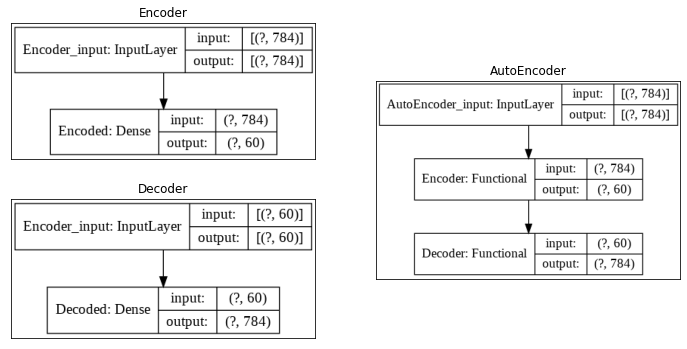

In [9]:
# plt.rcParams['figure.figsize'] = [16, 8]
plt.figure(figsize=(12,6))

# Encoder: 
plt.subplot(2,2,1)
plot_image(load_img('shallow_encoder_model.png'))
plt.title('Encoder')
# Decoder: 
plt.subplot(2,2,3)
plot_image(load_img('shallow_decoder_model.png'))
plt.title('Decoder')
# Autoencoder: 
plt.subplot2grid((2, 2), (0, 1), rowspan=2)
plot_image(load_img('shallow_autoencoder_model.png'))
plt.title('AutoEncoder')

# show
plt.show()

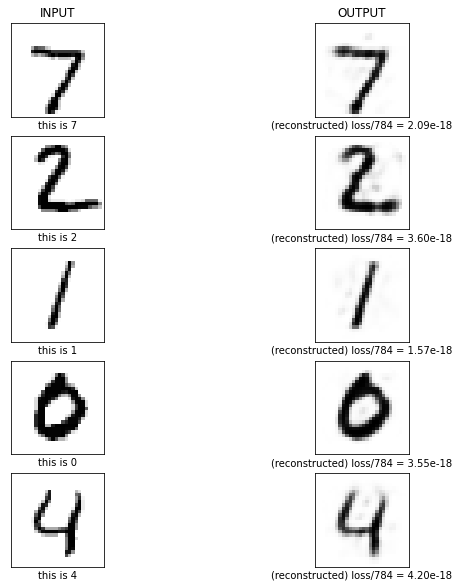

In [10]:
# make prediction on test set
data_reconst = autoencoder_model.predict(data_test).reshape(x_test.shape)
scale = x_test.shape[1]*x_test.shape[2]

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,2,2*i+1)
    if(i == 0):
      plt.title('INPUT')
    plot_image(x_test[i])
    plt.xlabel("this is {}".format(y_test[i]))

    plt.subplot(5,2,2*i+2)
    if(i == 0):
      plt.title('OUTPUT')
    plot_image(data_reconst[i])
    score, acc = autoencoder_model.evaluate(data_test[i].reshape(1, *data_test[i].shape), data_reconst[i].reshape(1,*data_test[i].shape), verbose=0)
    plt.xlabel("(reconstructed) loss/{1} = {0:0.2e}".format(score/scale, scale))
plt.show()

### AutoEncoder with deeper fullyConnected layer

In [11]:
# Make encoder:
encoder_input = Input(shape=(data_dim))
hidden = Dense(600, activation="sigmoid", name='Hidden_1')(encoder_input)
hidden = Dense(100, activation="sigmoid", name='Hidden_2')(hidden)
encoded = Dense(60, activation="sigmoid", name='Encoded')(hidden)
encoder_model = Model(encoder_input, encoded, name='Encoder')

# Make decoder:
decoder_input = Input(shape=encoded.shape[1:])
hidden = Dense(100, activation="sigmoid", name='Hidden_3')(decoder_input)
hidden = Dense(600, activation="sigmoid", name='Hidden_4')(hidden)
decoded  = Dense(data_dim, activation="sigmoid", name='Decoded')(hidden)
decoder_model = Model(decoder_input, decoded, name='Decoder')

# Make autoencoder:
ae_input = Input(shape=(data_dim))
ae_encoded = encoder_model(ae_input)
ae_decoded = decoder_model(ae_encoded)
autoencoder_model = Model(inputs=ae_input, outputs=ae_decoded)

autoencoder_model.compile(optimizer='adam', 
              loss=MeanSquaredError(), 
              metrics=['accuracy'])

history = autoencoder_model.fit(data_train, 
                    data_train,
                    batch_size=64,
                    epochs=20,
                    verbose=2,
                    validation_data=(data_test,data_test)
                    )


Epoch 1/20
938/938 - 3s - loss: 0.0613 - accuracy: 0.0104 - val_loss: 0.0524 - val_accuracy: 0.0090
Epoch 2/20
938/938 - 2s - loss: 0.0472 - accuracy: 0.0109 - val_loss: 0.0420 - val_accuracy: 0.0094
Epoch 3/20
938/938 - 3s - loss: 0.0396 - accuracy: 0.0087 - val_loss: 0.0374 - val_accuracy: 0.0083
Epoch 4/20
938/938 - 2s - loss: 0.0349 - accuracy: 0.0096 - val_loss: 0.0327 - val_accuracy: 0.0094
Epoch 5/20
938/938 - 2s - loss: 0.0302 - accuracy: 0.0127 - val_loss: 0.0278 - val_accuracy: 0.0140
Epoch 6/20
938/938 - 2s - loss: 0.0267 - accuracy: 0.0152 - val_loss: 0.0253 - val_accuracy: 0.0148
Epoch 7/20
938/938 - 3s - loss: 0.0244 - accuracy: 0.0145 - val_loss: 0.0229 - val_accuracy: 0.0163
Epoch 8/20
938/938 - 3s - loss: 0.0224 - accuracy: 0.0150 - val_loss: 0.0215 - val_accuracy: 0.0160
Epoch 9/20
938/938 - 2s - loss: 0.0211 - accuracy: 0.0153 - val_loss: 0.0205 - val_accuracy: 0.0161
Epoch 10/20
938/938 - 3s - loss: 0.0201 - accuracy: 0.0149 - val_loss: 0.0197 - val_accuracy: 0.0177

##### Visualization

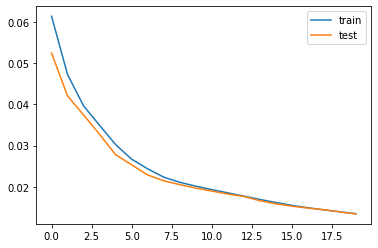

In [12]:
import matplotlib.pyplot as plt
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [13]:
# plot the autoencoder
tf.keras.utils.plot_model(encoder_model, 'deep_encoder_model.png', show_shapes=True)
encoder_model.save('deep_encoder.h5')
tf.keras.utils.plot_model(decoder_model, 'deep_decoder_model.png', show_shapes=True)
encoder_model.save('deep_decoder.h5')
tf.keras.utils.plot_model(autoencoder_model, 'deep_autoencoder_model.png', show_shapes=True)
encoder_model.save('deep_autoencoder.h5')

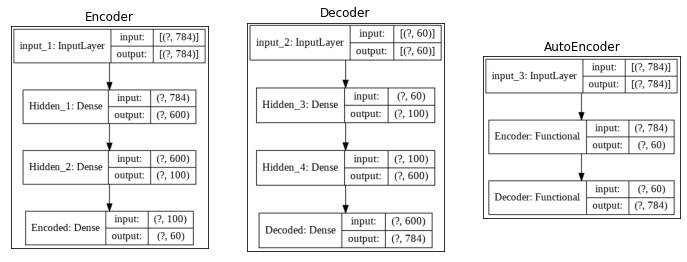

In [14]:
# plt.rcParams['figure.figsize'] = [16, 8]
plt.figure(figsize=(12,6))

# Encoder: 
plt.subplot(1,3,1)
plot_image(load_img('deep_encoder_model.png'))
plt.title('Encoder')
# Decoder: 
plt.subplot(1,3,2)
plot_image(load_img('deep_decoder_model.png'))
plt.title('Decoder')
# Autoencoder: 
plt.subplot(1,3,3)
plot_image(load_img('deep_autoencoder_model.png'))
plt.title('AutoEncoder')

# show
plt.show()

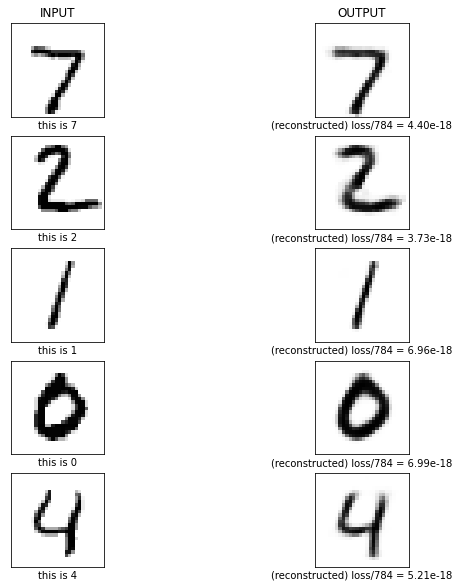

In [15]:
# make prediction on test set
data_reconst = autoencoder_model.predict(data_test).reshape(x_test.shape)
scale = x_test.shape[1]*x_test.shape[2]

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,2,2*i+1)
    if(i == 0):
      plt.title('INPUT')
    plot_image(x_test[i])
    plt.xlabel("this is {}".format(y_test[i]))

    plt.subplot(5,2,2*i+2)
    if(i == 0):
      plt.title('OUTPUT')
    plot_image(data_reconst[i])
    score, acc = autoencoder_model.evaluate(data_test[i].reshape(1, *data_test[i].shape), data_reconst[i].reshape(1,*data_test[i].shape), verbose=0)
    plt.xlabel("(reconstructed) loss/{1} = {0:0.2e}".format(score/scale, scale))
plt.show()

## PART B

In [16]:
data_train = x_train.reshape(*x_train.shape,1).astype('float32') / 255.
data_test = x_test.reshape(*x_test.shape,1).astype('float32') / 255.
data_dim = data_test.shape[1:]

### Use conv **layers**

In [17]:
# # Make encoder:
# encoder_input = Input(shape=data_dim)
# hidden = Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv1')(encoder_input)
# hidden = MaxPooling2D((2, 2), padding='same', name='MaxPool1')(hidden)
# hidden = Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv2')(hidden)
# encoded = MaxPooling2D((2, 2), padding='same', name='Encoded')(hidden)
# encoder_model = Model(encoder_input, encoded, name='Encoder')

# # Make decoder:
# decoder_input = Input(shape=encoded.shape[1:])
# decoder_conv = Conv2D(32, (3, 3), activation='relu', padding='same', name='Decode')(decoder_input)
# hidden = UpSampling2D((2, 2), name='Upsampling1')(decoder_conv)
# hidden = Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv3')(hidden)
# hidden = UpSampling2D((2, 2), name='Upsampling2')(hidden)
# decoded = Conv2D(1, (3, 3), activation='sigmoid', name='Decoded')(hidden)
# decoder_model = Model(decoder_input, decoded, name='Decoder')

# # Make autoencoder:
# ae_input = Input(shape=data_dim)
# ae_encoded = encoder_model(ae_input)
# ae_decoded = decoder_model(ae_encoded)
# autoencoder_model = Model(inputs=ae_input, outputs=ae_decoded)

# autoencoder_model.compile(optimizer='adam', 
#               loss=MeanSquaredError(), 
#               metrics=['accuracy'])

# history = autoencoder_model.fit(data_train, 
#                     data_train,
#                     batch_size=64,
#                     epochs=20,
#                     verbose=2,
#                     validation_data=(data_test,data_test)
#                     )

# Make encoder:
encoder_input = keras.Input(shape=data_dim)
hidden = Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
hidden = MaxPooling2D((2, 2), padding='same')(hidden)
hidden = Conv2D(32, (3, 3), activation='relu', padding='same')(hidden)
hidden = MaxPooling2D((2, 2), padding='same')(hidden)
hidden = Conv2D(8, (3, 3), activation='relu', padding='same')(hidden)
encoded = MaxPooling2D((2, 2), padding='same', name='Encoded')(hidden)
encoder_model = Model(encoder_input, encoded, name='Encoder')

# Make decoder:
decoder_input = keras.Input(shape=encoded.shape[1:]) # shape: (4, 4, 8) i.e. 128-dimensional
hidden = Conv2D(8, (3, 3), activation='relu', padding='same')(decoder_input)
hidden = UpSampling2D((2, 2))(hidden)
hidden = Conv2D(32, (3, 3), activation='relu', padding='same')(hidden)
hidden = UpSampling2D((2, 2))(hidden)
hidden = Conv2D(32, (3, 3), activation='relu')(hidden)
hidden = UpSampling2D((2, 2))(hidden)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(hidden)
decoder_model = Model(decoder_input, decoded, name='Decoder')

# Make autoencoder:
ae_input = Input(shape=data_dim)
ae_encoded = encoder_model(ae_input)
ae_decoded = decoder_model(ae_encoded)
autoencoder_model = Model(inputs=ae_input, outputs=ae_decoded)

autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder_model.fit(data_train, 
                    data_train,
                    epochs=20,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(data_test,data_test)
                    )

Epoch 1/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1783 - val_loss: 0.1213
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1149 - val_loss: 0.1087
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1059 - val_loss: 0.1015
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1008 - val_loss: 0.0983
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0976 - val_loss: 0.0952
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0953 - val_loss: 0.0928
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0934 - val_loss: 0.0919
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0920 - val_loss: 0.0900
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0908 - val_loss: 0.0892
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0898 - val_loss: 0.0879

In [18]:
encoded.shape

TensorShape([None, 4, 4, 8])

##### Visualization

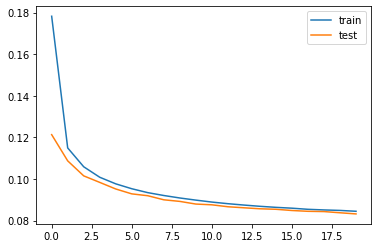

In [19]:
import matplotlib.pyplot as plt
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [20]:
# plot the autoencoder
tf.keras.utils.plot_model(encoder_model, 'conv_encoder_model.png', show_shapes=True)
encoder_model.save('conv_encoder.h5')
tf.keras.utils.plot_model(decoder_model, 'conv_decoder_model.png', show_shapes=True)
encoder_model.save('conv_decoder.h5')
tf.keras.utils.plot_model(autoencoder_model, 'conv_autoencoder_model.png', show_shapes=True)
encoder_model.save('conv_autoencoder.h5')

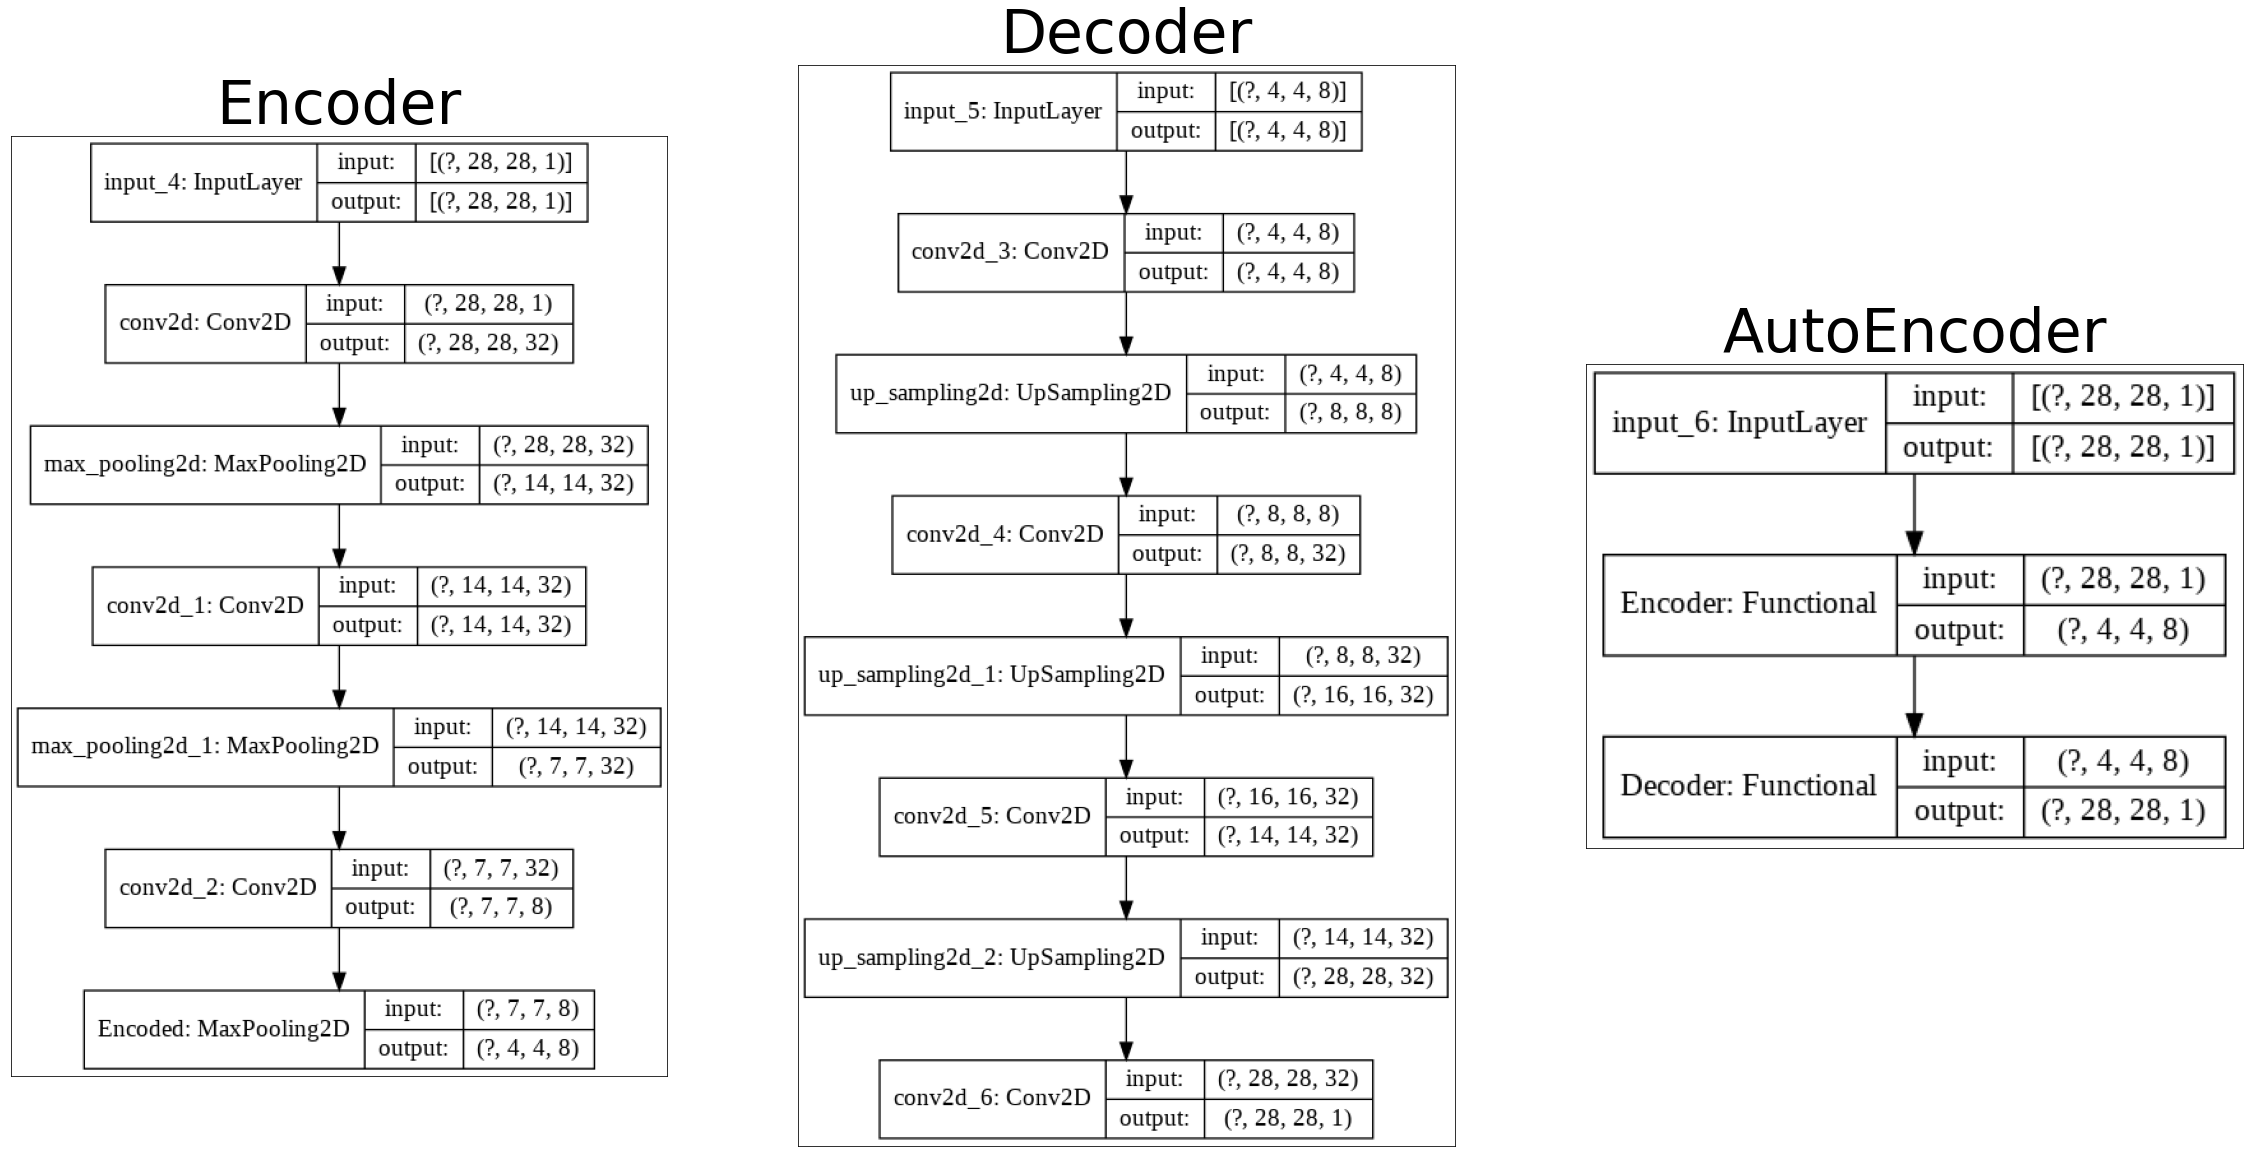

In [21]:
# plt.rcParams['figure.figsize'] = [16, 8]
plt.figure(figsize=(40,20))

# Encoder: 
plt.subplot(1,3,1)
plot_image(load_img('conv_encoder_model.png'))
plt.title('Encoder', fontdict={'fontsize':60})
# Decoder: 
plt.subplot(1,3,2)
plot_image(load_img('conv_decoder_model.png'))
plt.title('Decoder', fontdict={'fontsize':60})
# Autoencoder: 
plt.subplot(1,3,3)
plot_image(load_img('conv_autoencoder_model.png'))
plt.title('AutoEncoder', fontdict={'fontsize':60})

# show
plt.show()

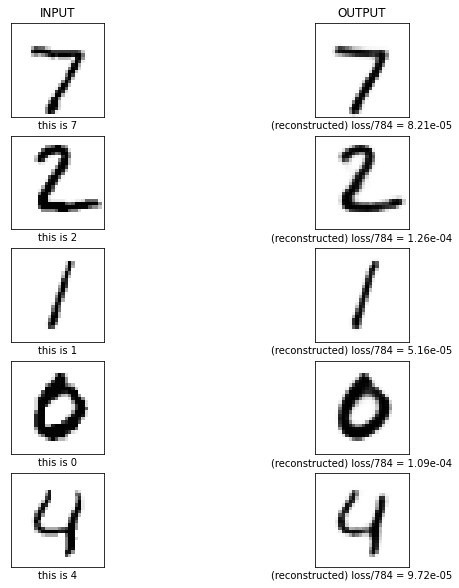

In [22]:
# make prediction on test set
data_reconst = autoencoder_model.predict(data_test).reshape(x_test.shape)
scale = x_test.shape[1]*x_test.shape[2]

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,2,2*i+1)
    if(i == 0):
      plt.title('INPUT')
    plot_image(x_test[i])
    plt.xlabel("this is {}".format(y_test[i]))

    plt.subplot(5,2,2*i+2)
    if(i == 0):
      plt.title('OUTPUT')
    plot_image(data_reconst[i])
    score = autoencoder_model.evaluate(data_test[i].reshape(1,*data_test[i].shape), data_reconst[i].reshape(1,*data_test[i].shape), verbose=0)
    plt.xlabel("(reconstructed) loss/{1} = {0:0.2e}".format(score/scale, scale))
plt.show()

> It has better results!



## Part C

In [23]:
data_train = x_train.reshape(*x_train.shape,1).astype('float32') / 255.
data_test = x_test.reshape(*x_test.shape,1).astype('float32') / 255.

noise_factor = 0.5
x_train_noisy = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape) 
x_test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape) 

data_train_noisy = np.clip(x_train_noisy, 0., 1.)
data_test_noisy = np.clip(x_test_noisy, 0., 1.)

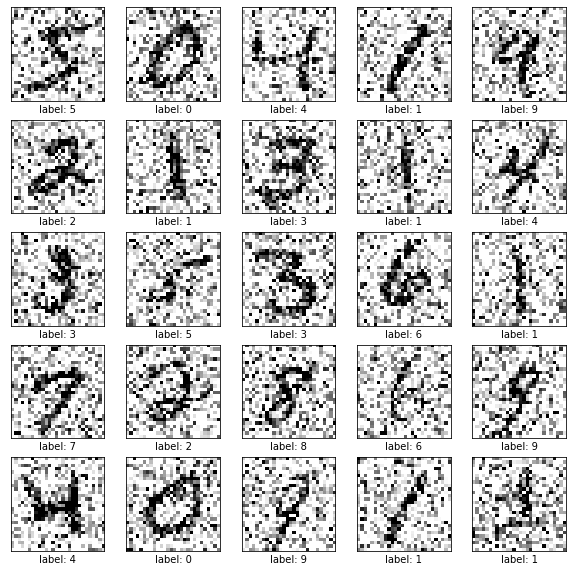

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plot_image(data_train_noisy[i].squeeze())
    plt.xlabel('label: {}'.format(y_train[i]))
plt.show()

> Too Noisy

In [25]:
history = autoencoder_model.fit(data_train_noisy, 
                    data_train,
                    epochs=20,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(data_test,data_test)
                    )

Epoch 1/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1455 - val_loss: 0.1251
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1241 - val_loss: 0.1159
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1205 - val_loss: 0.1097
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1183 - val_loss: 0.1036
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1165 - val_loss: 0.1043
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1152 - val_loss: 0.1023
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1140 - val_loss: 0.1032
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1131 - val_loss: 0.0982
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1122 - val_loss: 0.0970
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1116 - val_loss: 0.0971

Noise Factor: 0.5


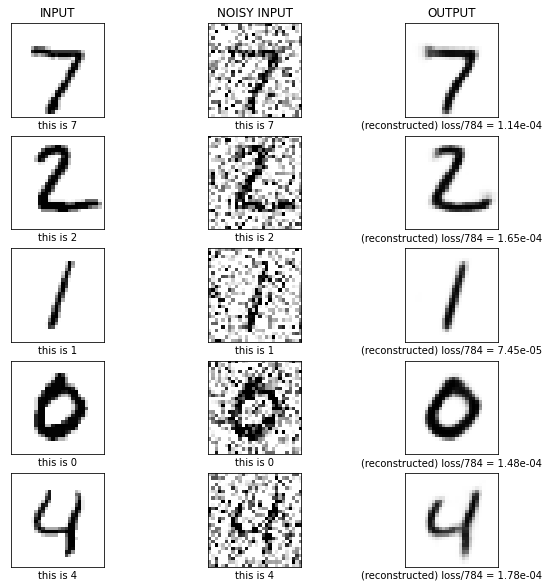

In [27]:
# make prediction on test set
data_reconst = autoencoder_model.predict(data_test_noisy).reshape(x_test.shape)
scale = x_test.shape[1]*x_test.shape[2]

print('Noise Factor:', noise_factor)
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,3,3*i+1)
    if(i == 0):
      plt.title('INPUT')
    plot_image(data_test[i].reshape(x_test[i].shape))
    plt.xlabel("this is {}".format(y_test[i]))

    plt.subplot(5,3,3*i+2)
    if(i == 0):
      plt.title('NOISY INPUT')
    plot_image(data_test_noisy[i].reshape(x_test[i].shape))
    plt.xlabel("this is {}".format(y_test[i]))

    plt.subplot(5,3,3*i+3)
    if(i == 0):
      plt.title('OUTPUT')
    plot_image(data_reconst[i])
    score = autoencoder_model.evaluate(data_test[i].reshape(1,*data_test[i].shape), data_reconst[i].reshape(1,*data_test[i].shape), verbose=0)
    plt.xlabel("(reconstructed) loss/{1} = {0:0.2e}".format(score/scale, scale))
plt.show()

###### Evaluate for some noise factors

In [72]:
data_train = x_train.reshape(*x_train.shape,1).astype('float32') / 255.
data_test = x_test.reshape(*x_test.shape,1).astype('float32') / 255.

def eval_autoencoder_denoising(data_test, noise_factor = 0.5, numRow = 5, figsize=(10,10), interval = None):
    x_test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape) 
    data_test_noisy = np.clip(x_test_noisy, 0., 1.)

    # make prediction on test set
    data_reconst = autoencoder_model.predict(data_test_noisy).reshape(x_test.shape)
    scale = x_test.shape[1]*x_test.shape[2]

    print('Noise Factor:', noise_factor)
    plt.figure(figsize=figsize)
    counter = 1
    if interval is not None:
        interval_list = np.random.default_rng().choice(interval, size=numRow, replace=False)
    else:
        interval_list = np.arange(numRow)
    print('indices: ', interval_list)
    start_flag = True
    for i in interval_list:
        plt.subplot(numRow,4,counter); counter += 1
        if(start_flag):
          plt.title('INPUT')
        plot_image(data_test[i].reshape(x_test[i].shape))
        plt.xlabel("this is {}".format(y_test[i]))

        plt.subplot(numRow,4,counter); counter += 2
        if(start_flag):
          plt.title('NOISY INPUT')
        plot_image(data_test_noisy[i].reshape(x_test[i].shape))
        plt.xlabel("this is {}".format(y_test[i]))

        plt.subplot(numRow,4,counter); counter += 1
        if(start_flag):
          plt.title('OUTPUT')
        plot_image(data_reconst[i])
        score = autoencoder_model.evaluate(data_test[i].reshape(1,*data_test[i].shape), data_reconst[i].reshape(1,*data_test[i].shape), verbose=0)
        plt.xlabel("(reconstructed) loss/{1} = {0:0.2e}".format(score/scale, scale))
        start_falg = False
    plt.show()


Noise Factor: 0.05
indices:  [5 3 8]


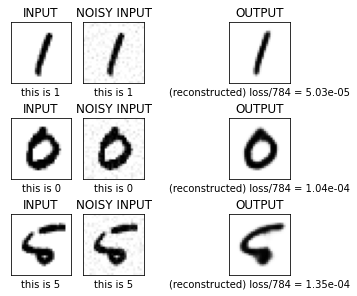

Noise Factor: 0.1
indices:  [9 0 4]


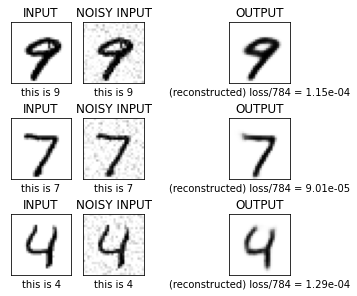

Noise Factor: 0.2
indices:  [2 8 0]


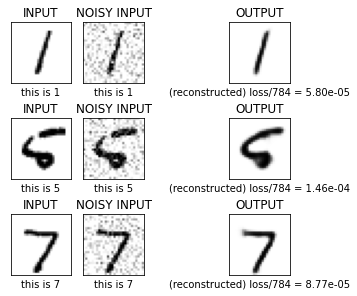

Noise Factor: 0.3
indices:  [4 3 5]


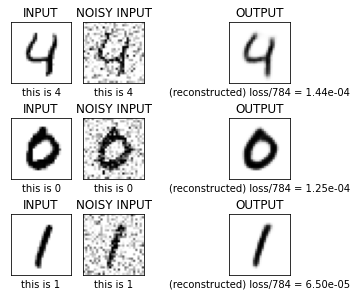

Noise Factor: 0.4
indices:  [5 2 4]


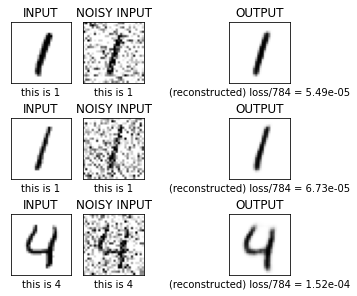

Noise Factor: 0.45
indices:  [0 7 3]


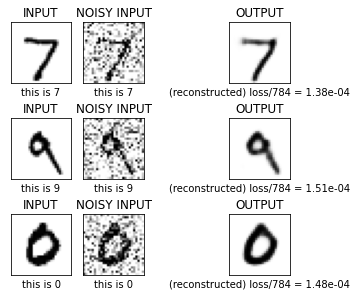

Noise Factor: 0.5
indices:  [1 3 2]


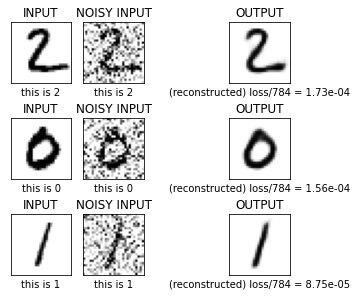

Noise Factor: 0.55
indices:  [0 7 2]


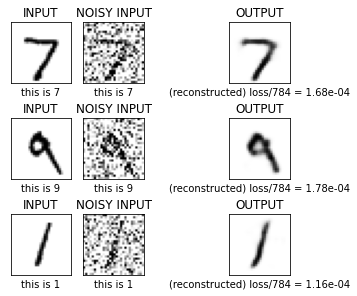

Noise Factor: 0.6
indices:  [1 7 3]


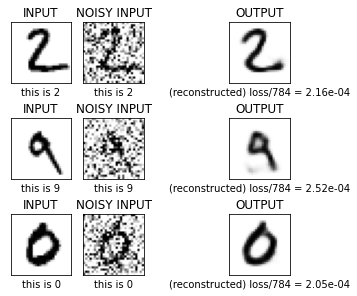

Noise Factor: 0.65
indices:  [9 2 6]


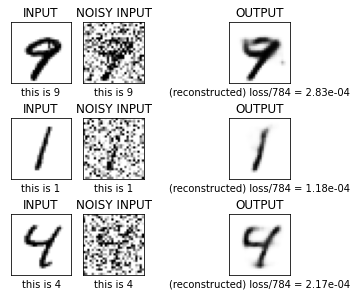

Noise Factor: 0.7
indices:  [2 4 3]


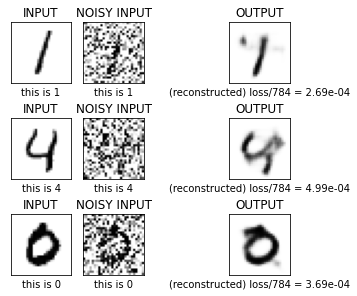

Noise Factor: 0.75
indices:  [7 1 0]


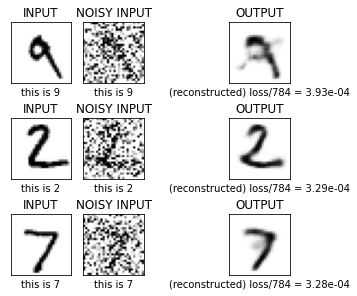

Noise Factor: 0.8
indices:  [6 1 0]


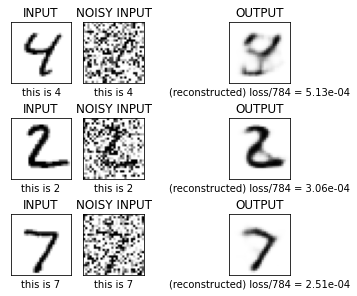

Noise Factor: 0.85
indices:  [5 1 6]


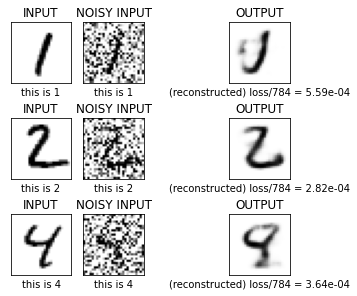

In [73]:
_sep_ = '='*50
figsize=(5,5); numRow=3; interval = 10
eval_autoencoder_denoising(data_test, noise_factor=0.05, numRow=numRow, figsize=figsize, interval=interval)
print(_sep_)
eval_autoencoder_denoising(data_test, noise_factor=0.1, numRow=numRow, figsize=figsize, interval=interval)
print(_sep_)
eval_autoencoder_denoising(data_test, noise_factor=0.2, numRow=numRow, figsize=figsize, interval=interval)
print(_sep_)
eval_autoencoder_denoising(data_test, noise_factor=0.3, numRow=numRow, figsize=figsize, interval=interval)
print(_sep_)
eval_autoencoder_denoising(data_test, noise_factor=0.4, numRow=numRow, figsize=figsize, interval=interval)
print(_sep_)
eval_autoencoder_denoising(data_test, noise_factor=0.45, numRow=numRow, figsize=figsize, interval=interval)
print(_sep_)
eval_autoencoder_denoising(data_test, noise_factor=0.5, numRow=numRow, figsize=figsize, interval=interval)
print(_sep_)
eval_autoencoder_denoising(data_test, noise_factor=0.55, numRow=numRow, figsize=figsize, interval=interval)
print(_sep_)
eval_autoencoder_denoising(data_test, noise_factor=0.6, numRow=numRow, figsize=figsize, interval=interval)
print(_sep_)
eval_autoencoder_denoising(data_test, noise_factor=0.65, numRow=numRow, figsize=figsize, interval=interval)
print(_sep_)
eval_autoencoder_denoising(data_test, noise_factor=0.7, numRow=numRow, figsize=figsize, interval=interval)
print(_sep_)
eval_autoencoder_denoising(data_test, noise_factor=0.75, numRow=numRow, figsize=figsize, interval=interval)
print(_sep_)
eval_autoencoder_denoising(data_test, noise_factor=0.8, numRow=numRow, figsize=figsize, interval=interval)
print(_sep_)
eval_autoencoder_denoising(data_test, noise_factor=0.85, numRow=numRow, figsize=figsize, interval=interval)
print(_sep_)